# Machine Learning - Classification

In [1]:
import sklearn as sl
import warnings
warnings.filterwarnings("ignore")
sl.__version__

'0.24.0'

## Definition of the Business Problem

Let's create a predictive model that can predict whether or not a person can develop Diabetes. To do this, we will use patient history data available in the dataset below. If the definition is not well done, it will compromise our work.

From this definition, we started our work of dataset collection, the transformation of variables and the division of Training and Test data.

Dataset: Pima Indians Diabetes Data Set
http://archive.ics.uci.edu/ml/datasets/diabetes

This dataset describes the medical records among Pima Inidians patients and each record is marked whether or not the patient developed diabetes. It contains multivariate data and can be used for time series.

### Information about attributes:
1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0 or 1)  

We need the predictor variables and the target variable.

## Extracting and Loading Data

There are several considerations when uploading data to the Machine Learning process. For example, does your data have a header? If not, you will need to set the title for each column. Do your files have comments? What is the delimiter of the columns? Are some data in quotation marks, single or double?

In [3]:
# Loading csv file using NumPy - First Way
# NumPy Library Provides Data Structure for Data Storage
import numpy as np
file = 'pima-data.csv' # archive
file_data = open(file, 'rb')  # Open file with proper permissions
data = np.loadtxt(file_data, delimiter = ",")  # Numpy loadtxt(), check delimiter function
print(data.shape)  # Check number of instances and attributes

(768, 9)


In [4]:
# Loading csv file using Pandas- Second Form
# Pandas Library Provides Data Structure for Data Storage
import pandas as pd
file = 'pima-data.csv'
columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# I already know that the file has no header and Fill on import
data = pd.read_csv(file, names = columns)
print(data.shape)

(768, 9)


In [4]:
# Loading csv file using Pandas (method we'll use on this notebook)
from pandas import read_csv # Import only this function of Pandas
file = 'pima-data.csv'
columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(file, names = columns)
print(data.shape)

(768, 9)


## Exploratory Data Analysis
### Data Preprocessing

### Descriptive Statistics

In [5]:
# Viewing the first 20 lines
data.head(20)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


If the number of lines in the file is vast, the algorithm can take a long time to be trained, and If the number of records is too small, we may not have enough records to train the model. It is reasonable to have up to one million records for the machine to process without difficulty. Above that, the record numbers will demand computationally from the engine.

If we have many columns in the file, the algorithm can present performance problems due to the high dimensionality. In this case, we can apply the dimensionality reduction if necessary. The best solution will depend on each situation. Remember: train the model in a subset of the more extensive Dataset and then apply it to new data. That is, it is not necessary to use the entire Dataset. It is enough to use a representative subset to train the algorithm.

In [6]:
# Viewing dimensions
data.shape

(768, 9)

The type of data is essential. It may be necessary to convert strings, or columns with integers may represent categorical variables or ordinary values.

In [7]:
# Data type of each attribute
data.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [8]:
# Statistical summary
data.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In classification problems, it may be necessary to balance the classes. Unbalanced classes (more significant volumes of one of the class types) are common and need to be addressed during the pre-processing phase.

We can see below that there is an evident disproportion between classes 0 (non-occurrence of diabetes) and 1 (occurrence of diabetes). We apply the class variable to the Pandas groupby function and measure its size:

In [9]:
# Distribution of classes
data.groupby('class').size()

class
0    500
1    268
dtype: int64

We have 500 records with class 0 and 268 class 1 records, meaning we have more records of people who have not developed Diabetes than people who have developed. When the algorithm goes through these numbers, it will end up learning more about a person who does not have Diabetes than a person who has Diabetes - we need to have the same proportion for the two classes of the set. 

One way to understand the relationship between data is through correlation. The Correlation is the relationship between 2 variables. The most common method for calculating correlation is the Pearson method, which assumes a normal distribution of data. 
A correlation of -1 shows a negative correlation, while 
A correlation of +1 shows a positive correlation. 
A correlation of 0 indicates that there is no relationship between the variables.

Some algorithms such as a linear regression and logistic regression can present performance problems with highly correlated (collinear) attributes.
How do I know if the algorithm requires modification? Consult the algorithm's documentation to find out what the algorithm specifically needs

In [10]:
# Apply Pearson's correlation between all variables in the dataset
data.corr(method = 'pearson')

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


What is relevant in the correlation's return is to observe the value of the predictor variables concerning the target. Example: Age x Target - positive correlation, as you get older, the more likely you are to develop Diabetes.

Skew (or symmetry) refers to the distribution of data assumed to be normal or Gaussian (bell curve). Many Machine Learning algorithms assume that the data has a normal distribution. Knowing the symmetry of the data allows you to make a preparation and deliver what the algorithm expects to receive, thus increasing the predictive model's accuracy.

Don't expect the data to come ready to use. At some point, we need to modify the variables so that they have a format of a normal distribution - this does not mean changing the variable but changing the scale so that it can be in the normal distribution format.

In [11]:
# Checking each attribute's skew
data.skew()

preg     0.901674
plas     0.173754
pres    -1.843608
skin     0.109372
test     2.272251
mass    -0.428982
pedi     1.919911
age      1.129597
class    0.635017
dtype: float64

# Bring Matplotlib Visualization to Exploratory Analysis

In [12]:
# It may be more interesting to generate the charts in a separate window as it is a set of smaller graphs.
import matplotlib.pyplot as plt

# To be able to generate graphics within this window
%matplotlib inline 

If we want to view the histogram more broadly in another window, we need to reset the Jupyter Notebook and remove the %matplotlib inline.

With the histogram, we can quickly assess the distribution of each attribute. Histograms group data into bins and provide a count of the number of observations in each container. 

We can quickly check the data's symmetry with the histogram and whether it is in a normal distribution. It will help to identify outliers.

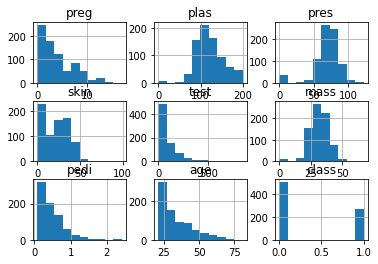

In [13]:
# Univariate Histogram
data.hist()
plt.show()

# Graphics appear small due to% matplotlib inline
 # To view more broadly:
  # Kernel > Restart e Clear Output
   # Remove the inline line, and the graph will appear in another window 

Density Plots are another way to visualize the distribution of data for each attribute. The plot is like a kind of abstract histogram with a smooth curve through the top of a histogram's bins. 

It may be easier to identify the distribution of the data using a density plot. The class seems to have two peaks because there are two classes — 0|1.

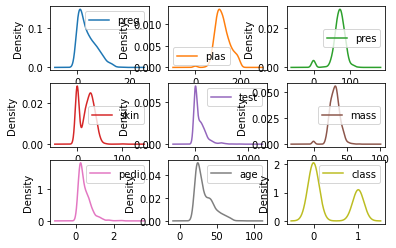

In [15]:
# Density Plot Univariate 'Density'
data.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)
plt.show()

With boxplots, we can also review the data distribution for each attribute. Boxplot helps to get an idea of the dispersion of the data and identifies outliers quickly: values that deviate a lot from the data's average. If you leave the outlier in the Dataset, it can affect the predictive model.

We can see that the dispersion of the data is quite different among the attributes. The age, skin, and test columns have symmetry very close to smaller data values.

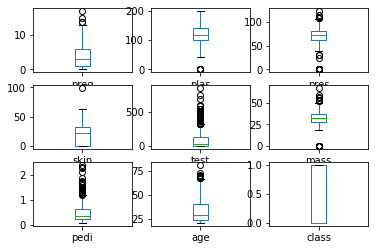

In [17]:
# Box and Whisker Plots
data.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False)
plt.show()

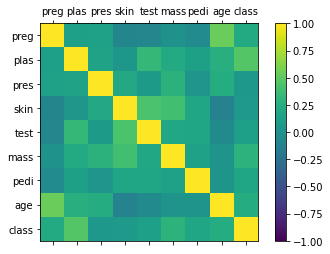

In [18]:
# Correlation matrix with variable names 
correlations = data.corr()

# The correlations variable receives all data correlations

import numpy as np             # Call Numpy
fig = plt.figure ()            # Plot figure
ax = fig.add_subplot (111)     # Add subplot
cax = ax.matshow (correlations, vmin = -1, vmax = 1) # Show correlations in the range of -1 to +1
fig.colorbar (cax)             # Coloring boxplot
ticks = np.arange (0, 9, 1)    # The array defines the size of the 9x9 square to be plotted
ax.set_xticks (ticks)          # Take the size of "ticks" and place it on the x axis
ax.set_yticks (ticks)          # Take the size of "ticks" and place it on the axis
ax.set_xticklabels (columns)   # Apply the columns listed at the beginning as labels
ax.set_yticklabels (columns)   # Applies the columns listed at the beginning as labels
plt.show () # Plot

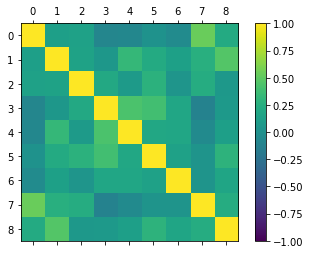

In [20]:
# Simplified generic correlation matrix
correlations = data.corr()

# Plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
plt.show()

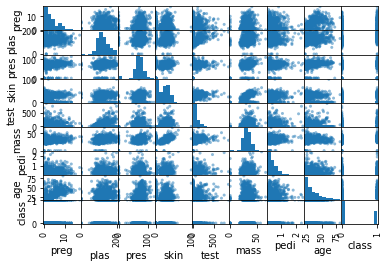

In [22]:
# Scatter Plot 
from pandas.plotting import scatter_matrix
scatter_matrix(data)
plt.show()

## Viewing with Seaborn
### Widely used for Exploratory Analysis

In [24]:
import seaborn as sns

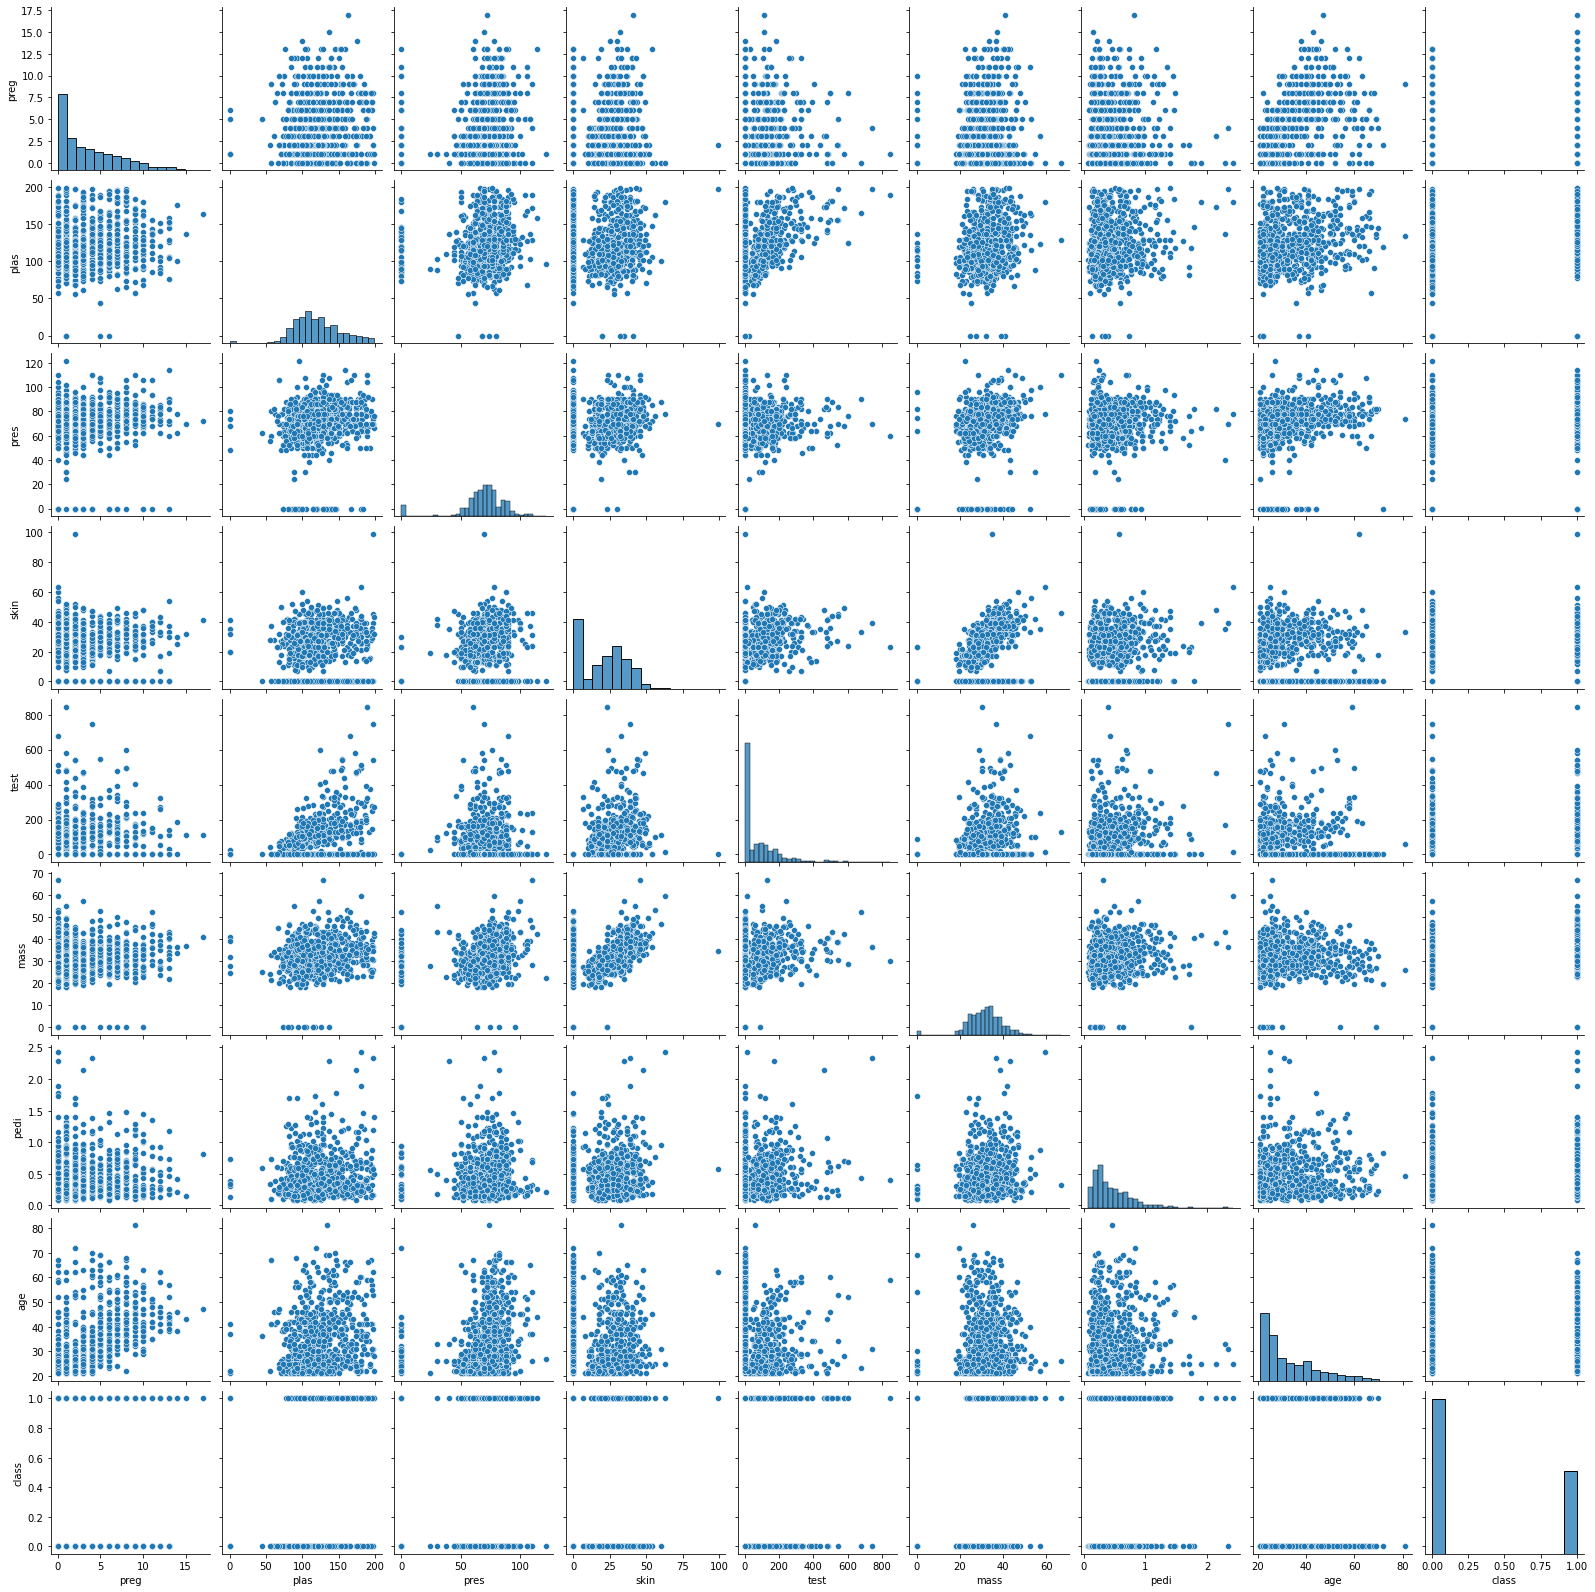

In [25]:
# Pairplot
sns.pairplot(data)

<AxesSubplot:>

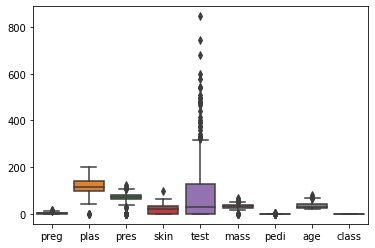

In [26]:
# Boxplot with vertical orientation, variables side by side
# Much simpler parameters
sns.boxplot(data = data, orient = "v")

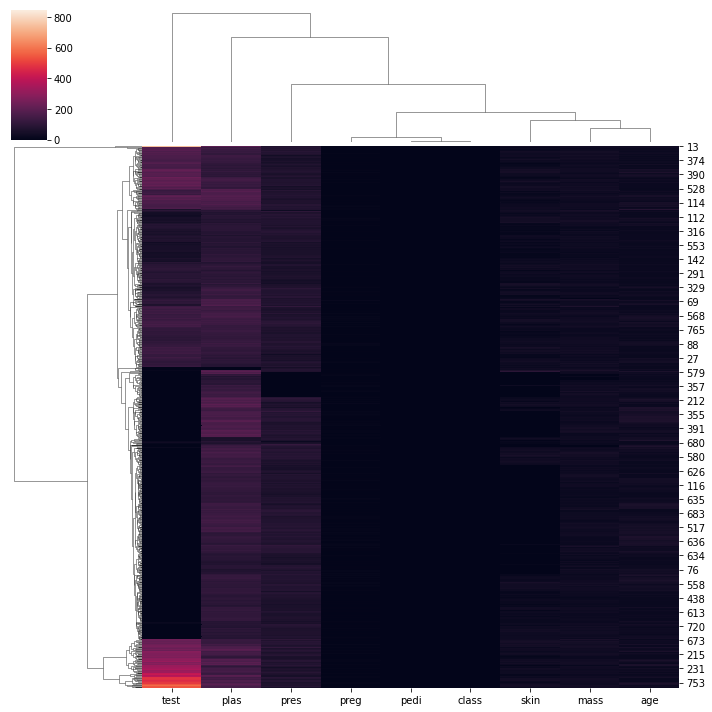

In [27]:
# Clustermap to see how the dataset is organized 
sns.clustermap(data)

In [24]:
data.describe

<bound method NDFrame.describe of      preg  plas  pres  skin  test  mass   pedi  age  class
0       6   148    72    35     0  33.6  0.627   50      1
1       1    85    66    29     0  26.6  0.351   31      0
2       8   183    64     0     0  23.3  0.672   32      1
3       1    89    66    23    94  28.1  0.167   21      0
4       0   137    40    35   168  43.1  2.288   33      1
5       5   116    74     0     0  25.6  0.201   30      0
6       3    78    50    32    88  31.0  0.248   26      1
7      10   115     0     0     0  35.3  0.134   29      0
8       2   197    70    45   543  30.5  0.158   53      1
9       8   125    96     0     0   0.0  0.232   54      1
10      4   110    92     0     0  37.6  0.191   30      0
11     10   168    74     0     0  38.0  0.537   34      1
12     10   139    80     0     0  27.1  1.441   57      0
13      1   189    60    23   846  30.1  0.398   59      1
14      5   166    72    19   175  25.8  0.587   51      1
15      7   100     0 

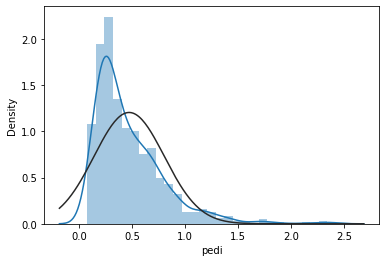

In [28]:
from scipy import stats
sns.distplot(data.pedi, fit = stats.norm);

## Preparing the Data for Machine Learning

After performing the Exploratory Analysis to understand the data, we are ready to start the pre-processing step. This step embraces the transformation of the variables, selects the best ones for model creation, reduces the dimensionality for massive data sets, sampling, and other techniques depending on the data, business problem, or algorithm.

Many algorithms expect to receive data in a specific format. It is our job to prepare the data in a structure that is suitable for the algorithm we are using. The challenge is that each algorithm requires a different system, which may require other transformations in the data. But it is possible in some cases to obtain good results without pre-processing work.

Therefore, the important thing is not to decorate the process but rather to understand when it has to be done. As we work on different projects, the data may already arrive pre-processed.

## Normalization - Method 1 (Same Scale)

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

Normalization, binarization, and standardization are techniques exclusively applied to quantitative variables. 

Normalization changes the scale of the data, and we have two techniques in scikit-learn; while standardization does not alter the distribution of data, it only places the distribution in a Gaussian format. That is, if the data is already in a normal distribution, we can only standardize it. And we still have binarization, which puts the data with the value 0 or 1 according to a rule that we specify.

It is one of the first tasks within the pre-processing. It is to put data on the same scale. Many Machine Learning algorithms will benefit from this and produce better results. This step is also called Normalization and means putting the data on a scale with a range between 0 and 1.
Normalization is valuable for optimization, being used in the core of the Machine Learning algorithms, such as gradient descent.

It helps algorithms such as regression and neural networks and algorithms that use distance measurements, such as KNN. Scikit-learn has a function for this step, called MinMaxScaler ().

In [29]:
# Transforming data to the same scale (between 0 and 1)

# Import of modules
from pandas import read_csv

# Importing MinMaxScaler function
from sklearn.preprocessing import MinMaxScaler 

# Loading data
file = 'pima-data.csv'
columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv (file, names = columns)
array = data.values # Take the data and place it in an objectc called array 

# Separating the array into input (X) and output (Y) components

# The dataset has 9 columns, the first 8 of which are predictors.
X = array [:, 0: 8] 

# The last column is the target class
Y = array [:, 8] 

# Generating the new scale (normalizing the data)
scaler = MinMaxScaler (feature_range = (0, 1))

# Fit for predictor variables
rescaledX = scaler.fit_transform (X) 

# Summarizing the transformed data
print ("Original Data: \ n \ n", data.values)
print ("\ nStandardized Data: \ n \ n", rescaledX [0: 5 ,:])

Original Data: \ n \ n [[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]
\ nStandardized Data: \ n \ n [[0.35294118 0.74371859 0.59016393 0.35353535 0.         0.50074516
  0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 0.29292929 0.         0.39642325
  0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 0.         0.         0.34724292
  0.25362938 0.18333333]
 [0.05882353 0.44723618 0.54098361 0.23232323 0.11111111 0.41877794
  0.03800171 0.        ]
 [0.         0.68844221 0.32786885 0.35353535 0.19858156 0.64232489
  0.94363792 0.2       ]]


Here we transform the data to the same scale. We import the MinMaxScaler function for Normalization and read_csv function for reading the dataset.Next, we define the column names, pass the data values to an array, apply slicing in subsets, whereas the first eight columns are X predictors and the last column is the target variable y.

With the parameter feature_range of the MinMaxScaler function, we specify the scale between 0 and 1. After creating the scaler object, we use the fit process to apply the scaler to the X predictor data set - we do not need to normalize the output y variable in this case. That is, we use Normalization only to quantitative predictor variables.

## The Normalized data still represents the same information, BUT on a different scale.


### Normalization - Method 2 (Same Data Scale)

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html

This normalization method is a bit more advanced. It uses the normalizer function. In this case, we want to normalize the data, leaving it with a length of 1, creating a vector of length 1. 

Therefore, here we used the method with Normalizer function instead of MinMaxScaler for normalizing variables:

In [30]:
# Normalizing the data leaving them with a length equal to 1
from pandas import read_csv
from sklearn.preprocessing import Normalizer

# Import data
file = 'pima-data.csv'
columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(file, names = columns)
array = data.values

# Separating the array into input and output components
X = array[:,0:8]
Y = array[:,8]

# Generating normalized data
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

# Sumarizing the transformed data
print("Original data: \n\n", data.values)
print("\nNormalized data: \n\n", normalizedX[0:5,:])

Original data: 

 [[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]

Normalized data: 

 [[0.03355237 0.82762513 0.40262844 0.19572216 0.         0.18789327
  0.00350622 0.27960308]
 [0.008424   0.71604034 0.55598426 0.24429612 0.         0.22407851
  0.00295683 0.26114412]
 [0.04039768 0.92409698 0.32318146 0.         0.         0.11765825
  0.00339341 0.16159073]
 [0.00661199 0.58846737 0.43639153 0.15207584 0.62152733 0.185797
  0.0011042  0.13885185]
 [0.         0.5963863  0.17412739 0.15236146 0.73133502 0.18762226
  0.00996009 0.14365509]]


## Standardization (Normal Distribution)

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

Standardization is the technique for transforming attributes with Gaussian distribution and different means and standard deviations into a standard Gaussian distribution with the mean equal to 0 and standard deviation equal to 1. 

The attributes of our dataset already have a normal distribution, only that this normal distribution presents different means and different standard deviation. The standardization will standardize the data with a mean 0 and standard deviation of 1.

Standardization helps algorithms that expect the data to have a Gaussian distribution, such as linear regression, logistic regression, and linear discriminant analysis. Works well when the data is already on the same scale. scikit-learn has a function for this step, called StandardScaler().

In [32]:
# Standardizing the data (0 for the mean, 1 for the standard deviation)

# Importing modules
from pandas import read_csv
from sklearn.preprocessing import StandardScaler

# Importing data
file = 'pima-data.csv'
columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv (file, names = columns)
array = data.values

# Separating the array into input and output components
X = array[:,0:8]
Y = array[:,8]

# Generating the new standard
scaler = StandardScaler().fit(X) # Applying the Standardization function 
standardX = scaler.transform(X)  # Applying to predictor variables

# Sumarizing the transformed data
print("Original Data: nn", data.values)
print("nStandardized Data: nn", standardX[0:5,:])


Original Data: nn [[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]
nStandardized Data: nn [[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575  0.53090156 -0.69289057 -0.68442195
  -0.36506078 -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 -1.28821221 -0.69289057 -1.10325546
   0.60439732 -0.10558415]
 [-0.84488505 -0.99820778 -0.16054575  0.15453319  0.12330164 -0.49404308
  -0.92076261 -1.04154944]
 [-1.14185152  0.5040552  -1.50468724  0.90726993  0.76583594  1.4097456
   5.4849091  -0.0204964 ]]


## Binarization (Transform data into 1 or 0)

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Binarizer.html

As its name infers, it is a method for transforming data into binary values. We can set a limit value in our data, which we call a threshold, that will mark all values above the threshold will be marked as 1, and below the threshold will be marked as 0. 

Binarization is useful when we have probabilities and want to turn the data into something with more meaning. scikit-learn has a function for this step, called Binarizer().

In [34]:
# Binarization

# Importing of modules
from pandas import read_csv
from sklearn.preprocessing import Binarizer

# Loading the data
file = 'pima-data.csv'
columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(file, names = columns)
array = data.values

# Separating the array into input and output components
X = array[:,0:8]
Y = array[:,8]

# Generating binarization
binarizer = Binarizer (threshold = 0.2).fit(X)
binaryX = binarizer.transform(X)

# Sumarizing the transformed data
print("Original Data:", data.values)
print("nBinarized Data:", binaryX[0:5,:])

Original Data: [[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]
nBinarized Data: [[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 0. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]


## Feature Selection

Once the variables are transformed, we can now select the best variables to build our model, which we call feature selection. In practice, we want to choose the best variables within the dataset to train a machine learning algorithm.

The attributes present in our dataset and that we use in the training data will significantly influence the predictive model's accuracy and result. Unnecessary features will harm performance, while collinear characteristics can affect the rate of accuracy of the model. Eventually, we won't know for ourselves what is irrelevant or not.

However, we have the opposite problem when we have two variables that represent the same information, which we call collinear attributes that can also impair the algorithm's learning. Scikit-learn has functions that automate the work of extracting and selecting variables.

The feature selection step is to select the attributes (variables) that will be the best candidates for predictor variables. Feature Selection helps us reduce overfitting (when the algorithm learns extremely), increases model accuracy, and reduces training time. The idea is to create a generalizing model that takes Training Data and assumes any data set.
In our example, we have eight predictor variables and one target variable. Are the eight predictor variables relevant to our model? Keep in mind that the Machine Learning model must be generalizable; we can not create a model just for the training data. We need to create a model so that after it can receive new sets of data.

So we should try to get out of our front everything that might give us problems: irrelevant attributes or collinear attributes - it is not a simple task. In short, the selection of variables is made to select the essential variables for constructing the predictive model.

## Univariate Selection

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

Now we will see some techniques for picking variables. It is essential to consider that no method is perfect in creating each model; that is, we should look for the most appropriate technique of adapting the data to an algorithm to create the predictive model.

We may have a variable selection technique that presents a result, and after training the algorithm, we can notice that the outcome is not satisfactory. We go back to the beginning, try to find more adherent variables, compare the application of one technique with the other, and try it again. There is no perfection in this process.

Statistical tests can select attributes that have a strong relationship with the output variable (y-class) that we are trying to predict. 
To teach the algorithm to predict this variable, we use all eight other predictor variables, but are they all relevant to predicting the target class variable? Therefore, we can use statistical tests that help us in the choices of these variables.

Scikit-learn provides the SelectKBest() function used with various statistical tests to select the optimal attributes (predictor variables-X). Let's use the statistical chi-square test and select the four best features used as predictor variables.

In the Scikit-learn documentation, there is a list of all statistical tests offered by the SelectKBest() function.

In [37]:
# Extraction of Variables with Univariate Statistical Tests (Chi-Square Test in this example)
from pandas import read_csv 

from sklearn.feature_selection import SelectKBest # Package feature_selection
from sklearn.feature_selection import chi2 # Select which of the statistic functions to use

# Loading the data
file = 'pima-data.csv'
columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv (file, names = columns)
array = data.values

# Separating the array into input and output components
X = array[:,0:8] # Predictors
Y = array[:,8] # Target

# Object best_var will contain the best predictor 4 variables "k"
best_var = SelectKBest (score_func = chi2, k = 4)

# Performs the scoring function in (X, y) and gets the selected features
fit = best_var.fit(X, Y)
# Checks with .fit() which of the variables will be most relevant to X and Y
# We want the best Predictor Variables to predict Target

# After evaluating the .fit() function, we extract only the most relevant
# Reduces X for selected 4k features
features = fit.transform(X)

# Printing results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', features.shape[1])
print('Features:', features)

Original number of features: 8
Reduced number of features: 4
Features: [[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 ...
 [121.  112.   26.2  30. ]
 [126.    0.   30.1  47. ]
 [ 93.    0.   30.4  23. ]]


## Recursive Elimination of Attributes (RFE)

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

Within this technique, we will use Machine Learning to find the best predictor variables and then build the Machine Learning model, that is, to be able to extract in an automated way relevant information from the data set - the best predictor variables.

Recursive elimination is another technique for selecting attributes, which recursively removes features and constructs them with the remaining components. This technique uses the model's accuracy to identify the characteristics that most contribute to predicting the target variable.

The example below uses the Recursive Attribute Elimination technique with a Logistic Regression algorithm to select the three best predictor variables. The RFE selected the variables "preg", "mass" and "pedi", which are marked as True in "Selected Attributes" and with value 1 in "Attribute Ranking."

In [38]:
# Recursive Elimination of Variables

# Import of modules
from pandas import read_csv
from sklearn.feature_selection import RFE # Package feature_selection
from sklearn.linear_model import LogisticRegression

# Loading the data
file = 'pima-data.csv'
columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv (file, names = columns)
array = data.values

# Separating the array into input and output components
X = array[:,0:8]
Y = array[:,8]

# Creation of the Machine Learning model from the ready package
model = LogisticRegression()

# RFE ELIMINATION RECURSIVE, extract the 3 variables that contribute the most to accuracy
rfe = RFE (model, 3) # After creating the model, apply the RFE function
# Once the rfe is created, perform the fit(x,y)
fit = rfe.fit(X, Y)

# Print of results
print("Predictor Variables:", data.columns[0:8])
print("Selected Variables: %s" % fit.support_)
print("Attribute Ranking: %s" % fit.ranking_)
print("Number of Best Attributes: %d" % fit.n_features_)

Predictor Variables: Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'], dtype='object')
Selected Variables: [ True False False False False  True  True False]
Attribute Ranking: [1 2 4 5 6 1 1 3]
Number of Best Attributes: 3


Here we import the RFE function of the feature_selecion module from the scikit-learn library to apply the variable selection technology and import the logistic regression algorithm from the linear_model.

Above, we load the data, make the slicing data set for the predictor and target variables, and instantiate the logistic regression model. Once the instance that owns the model name is created, we apply the RFE function; that is, we want to extract the 3 variables that most contribute to the accuracy of this predictive model for the rfe object. We generate the relationship of the X and y sets with the fit and print the result.

## Ensemble Method for Variable Selection

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

Here we will see another method of selecting variables using machine learning through an ensemble method - it is a category that encompasses a range of algorithms within a single algorithm. We feed this package of algorithms, the data is being distributed by these algorithms that make up the package and they are processing and making the predictions and at the end they vote to see which of those algorithms within the package has reached a more performative result. That is, several algorithms working in parallel and competing with each other to increase the accuracy of the result. 

The algorithm in question is the Extra Trees Classifier, that is, a set of decision trees. ETC has the power to pick up multiple trees, place them inside a package, and in the end have an ensemble method to work with sorting - much like Random Forest.

Bagged Decision Trees, such as the RandomForest algorithm (these are called Ensemble Methods), can be used to estimate the importance of each attribute. This method returns a score for each feature. The higher the score, the greater the importance of the attribute.

In [41]:
# Importance of attribute with Extra Trees Classifier 
# Import Modules
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier # Ensemble Package

# Loading data
file = 'pima-data.csv'
columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv (file, names = columns)
array = data.values

# Separating array into input and output components
X = array[:,0:8]
Y = array[:,8]

# Predictive Model Creation - Feature Selection
model = ExtraTreesClassifier() # When parameters are not displayed the algorithm itself selects
model.fit(X, Y) # Training Process presenting input and output

# Print of Results
print(data.columns[0:8])
print(model.feature_importances_)

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'], dtype='object')
[0.10736997 0.24260399 0.09910453 0.07798603 0.07413968 0.1401132
 0.11780032 0.14088227]


We created the ExtraTreesClassifier() model and related the X and y sets to the fit method, the training process. We take the ExtramTreesClassifier algorithm that already has its default parameters and present the data to it. Once this is done, we have the model created, trained, and listed the most relevant attributes.

These are the three main variable selection techniques: Univariate selection, recursive elimination, and ensemble method. Each of these methods can generate different variables since each method uses its parameters. It is up to the data scientist to choose what best suits the business problem and the available data - genuine engineering attributes.

## Principal Component Analysis (PCA)

Within the data pre-processing step, we will now address dimensionality reduction after discussing the transformation and selection of variables. We will think about the recursive elimination of attributes. We had eight predictor variables, applied RFE recursive elimination, and the algorithm detected that three characteristics with greater relevance for constructing the model. With this in mind, we could discard the other five remaining attributes and use only the top 3 for model construction.

Although we are using the most relevant attributes, we discard attributes that may have some information. It may be irrelevant, but it's still information; we could lose something no small. The method of selecting variables has its advantages, but it can also cause problems.

Therefore, we will see the reduction of dimensionality that instead of discarding the variables, we can encapsulate them in components through the PCA, one of the compression tools. That is, we take groups of variables and store them in components. This technique allows you to extract a small number of dimensional sets from a high-dimensional dataset. With fewer variables, the visualization also becomes much more meaningful. PCA is most useful when dealing with three or more dimensions.

In [33]:
# Image source: http://www.nlpca.org/pca_principal_component_analysis.html
from IPython.display import Image
Image(url = 'images/PCA2.png')

In the graph on the left, we have the variables Gene1, Gene2, and Gene3. We can apply the PCA algorithm of unsupervised learning; that is, we do not know what the output is - The PCA will determine the patterns and group the data.
In the result on the right, the PCA creates the PC1 component and the PC2 component using multivariate statistical techniques. These components are groups of variables that have a very similar variance. Then we take these components and train the machine learning algorithm.

In general terms, PCA seeks to reduce the number of dimensions of a dataset by projecting the data into a new plan. Using this new projection, the original data, which can involve several variables, can be interpreted using fewer "dimensions." In the reduced dataset, we can more clearly observe trends, patterns, and outliers. The PCA provides only more clarity to the pattern that is already there.

In [43]:
# Extraction Feature

# Import of modules
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Loading the data
file = 'data/pima-data.csv'
columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv (file, names = columns)
array = data.values

# Separating the array into input and output components
X = array[:,0:8] # Predictors
Y = array[:,8] # Target

# Normalizing the data
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X) 

# Selection of attributes
pca = PCA(n_components = 4) # Create PCA 4k of similires variances

# Each component has the same impact to the algorithm
fit = pca.fit (rescaledX)

# Sumarizing the components
print("Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Variance: [0.31192249 0.21186663 0.11819693 0.10349153]
[[ 0.65204425  0.24136132  0.22516492 -0.0559239  -0.00386329  0.0520263
   0.01915023  0.67798812]
 [-0.16932416  0.35676608  0.33104032  0.59815466  0.44736849  0.31942511
   0.26749398 -0.05428262]
 [ 0.24628749 -0.69388768  0.45574002  0.38484968 -0.1908919   0.12259645
  -0.19359513 -0.11447898]
 [ 0.51093814 -0.17502202 -0.66594541  0.34250382  0.23019001 -0.04263694
   0.24412554 -0.18197453]]


Let's call the MinMaxScaler function of the pre-processing module to normalize the data and the PCA algorithm of the decomposition module for dimensionality reduction. We load the data, separate the x and y sets, do normalization with MinMaxScaler establishing the range between 0 and 1, and apply the training to the X set.

Once normalized, we created the PCA by establishing four components we apply the PCA fit training to the normalized data. We have four components, the first component being the one with attributes of more significant variance, the second component of the second largest variance, and so on. 

When we're going to train the algorithm, we're not going to introduce the algorithm to the dataset variables but the components. Thus, we were able to transmit all the information in the set so that the algorithm can achieve high accuracy. With highly dimensional datasets with more than 300 variables, we can reduce all of this to 150, 80, or 50 components to facilitate machine learning algorithm training. Therefore, PCA dimensionality reduction is a valuable pre-processing technique used according to the business problem.

## Sampling

From now on, we'll complete the pre-processing data step to move on to the following data science track. Sampling is an essential concept for dividing data into training data and test data. We must wonder whether we need to use the entire data set available to train the Machine Learning algorithm. Ideally, we will collect a sample from the dataset to train the algorithm and another piece to test the model's performance. 

We do this because we already have the historical data set. We collect in the past data from patients who have developed or not diabetes. We have several predictor variables and the output variable; that is, we already know the patients who developed the disease or not. We now want to teach the algorithm how to detect this for us in the future. 

When training the algorithm with a data sample intended for training, we will test the algorithm with another piece of this data set; after all, we already know the result since we work with historical data. Therefore, we will compare the result of the model with what belongs to the test data and calculate the model's error rate. 

If we present the model data that we've never seen before, we don't have a reference to measure model performance. Thus, we use the training data to train and use another sample to test the performance of the predictions and therefore evaluate the model according to the error rate generated.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [46]:
# Evaluation using training and test data

# Import of modules
from pandas import read_csv
from sklearn.model_selection import train_test_split # Function for split
from sklearn.linear_model import LogisticRegression # Create the model and then endorse the PERFORMANCE

# Loading the data
file = 'data/pima-data.csv'
columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv (file, names = columns)
array = data.values

# Separating the array into input and output components
X = array[:,0:8] # Predictors
Y = array[:,8]   # Target

# Setting the size of the samples
test_size = 0.33 

# This is important to compare accuracy with other Machine Learning algorithms.
seed = 7


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = seed)


# Creation of the model
model = LogisticRegression()

# Model training applying fit
model.fit(X_train, Y_train)

# SAMPLING PROCEDURE
# 1. Trains algorithm
# 2. Generated the above model, tests with test data below.

result = model.score(X_test, Y_test) # Applying test data now from split
print("Accuracy in Test Data: %.3f%%" % (result * 100.0))

Accuracy in Test Data: 78.740%


To make this division of the sets, we will import the train_test_split function of the model_selection module and import the LogisticRegression model to create the Machine Learning model and then evaluate the model's performance.

Once this is done, we load the data; we separate it with the slicing of the set that we did up to that instant, we define a test_size with the value 0.33 and specify a seed to reproduce an expected result.

Next, we call the train_test_split function of scikit-learn, we pass X and y as a parameter, we apply the test_size that was already defined just now, and the random_state equal to the seed set. This function train_test_split returns four values, so we need four variables. 

Then we instantiate the model with the LogisticRegression algorithm and do the training with the training data generated by the train_test_split.

Next, we call the score function to measure the model's performance, calculate its score and return to accuracy. For this, we use the set of tests that we have set up to evaluate the model's performance. The accuracy of the model was 75%. 

Accuracy is measured in the test data because the model has been trained with the training data, and we need to present a set of data that it has not yet seen but that we know to evaluate the performance.

However, there is still an even more effective division technique, cross-validation.

# Cross Validation - Best Performance of Results

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

• Cross-Validation is a technique that can evaluate a model's performance with minor variance than the technique of dividing the data into training/testing. With this technique, we divide the data into parts commonly called k-folds (for example, k = 5, k = 10). Each piece is called a fold. The algorithm is trained in k-1 folds. Each fold is used in training repeatedly and one fold at a time. After running the process in k-1 folds, we can sum up the performance in each fold using the mean and the standard deviation (I said that Statistics was influential in the Big Data Analytics process). The result is usually more reliable and offers greater accuracy to the model. The key to this process is to set the correct k value so that the number of folds adequately represents the number of repetitions required.

In [38]:
from IPython.display import Image
Image(url = 'images/cross-validation.jpg')

In [48]:
# Cross Validation
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression 

file = 'pima-data.csv'
columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(file, names = columns)
array = data.values

X = array[:,0:8]
Y = array[:,8]

num_folds = 10 
seed = 7 

kfold = KFold(num_folds, True, random_state = seed)

model = LogisticRegression()
result= cross_val_score(model, X, Y, cv = kfold)


print("Accuracy: %.3f%%" % (result.mean() * 100.0))

Accuracy: 77.734%
